Hierarchical Clustering for Seed Categorization: Implement Hierarchical Clustering on the UCI seed dataset to divide it in groups and use the cluser IDs as labels for a subsequent K nearest neighbor classifier to identify the species. You should use multiple clusterings here and have to determine what a good number of clusters would be and how to determine the similarity between clusters and a data point. 

Importing the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
# I have used my google drive to load the training and testing data
# Upload the dataset file in your google drive and change the path to run the below line
from google.colab import drive
drive.mount('/content/drive')
# i have divided the given dataset into training and testing dataset ratio of 70:30
X= pd.read_csv('/content/drive/MyDrive/ML/seeddataset.csv',dtype='object')
print(X)
X_test= pd.read_csv('/content/drive/MyDrive/ML/seeddatasettest.csv',dtype='object')
print(X_test)

Mounted at /content/drive
        f1     f2      f3     f4     f5     f6     f7 class
0    15.26  14.84   0.871  5.763  3.312  2.221   5.22     1
1    14.88  14.57  0.8811  5.554  3.333  1.018  4.956     1
2    14.29  14.09   0.905  5.291  3.337  2.699  4.825     1
3    13.84  13.94  0.8955  5.324  3.379  2.259  4.805     1
4    16.14  14.99  0.9034  5.658  3.562  1.355  5.175     1
..     ...    ...     ...    ...    ...    ...    ...   ...
143  13.37  13.78  0.8849   5.32  3.128   4.67  5.091     3
144  12.62  13.67  0.8481   5.41  2.911  3.306  5.231     3
145  12.76  13.38  0.8964  5.073  3.155  2.828   4.83     3
146  12.38  13.44  0.8609  5.219  2.989  5.472  5.045     3
147  12.67  13.32  0.8977  4.984  3.135    2.3  4.745     3

[148 rows x 8 columns]
       f1     f2      f3     f4     f5     f6     f7 class
0   11.18  12.72   0.868  5.009   2.81  4.051  4.828     3
1    12.7  13.41  0.8874  5.183  3.091  8.456      5     3
2   12.37  13.47  0.8567  5.204   2.96  3.919  5.001 

Separating the label from the given dataset to implement Heirarchial Clustering

In [2]:
y = X.iloc[:,-1]
X = X.iloc[:, 0:7]
X = X.to_numpy()
y = y.to_numpy()
X=X.astype('float64')
print("Shape of unlabedled training data: ",X.shape)
print("label data",y)
y_test = X_test.iloc[:,-1]
X_test = X_test.iloc[:, 0:7]
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()
X_test=X_test.astype('float64')
print("Shape of unlabedled testing data: ",X_test.shape)
print("label data",y_test)

Shape of unlabedled training data:  (148, 7)
label data ['1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '2' '2' '2' '2'
 '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2' '2' '2' '2' '2' '2' '2' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3'
 '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3'
 '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3'
 '3' '3' '3' '3']
Shape of unlabedled testing data:  (62, 7)
label data ['3' '3' '3' '3' '3' '3' '3' '3' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '2' '2'
 '2' '2' '2' '2' '2' '2' '3' '3' '3' '3' '3' '3' '3' '3' '1' '1' '1' '1'
 '2' '2' '2' '2' '3' '3' '3' '3']


Visual representation of the output target values classes:

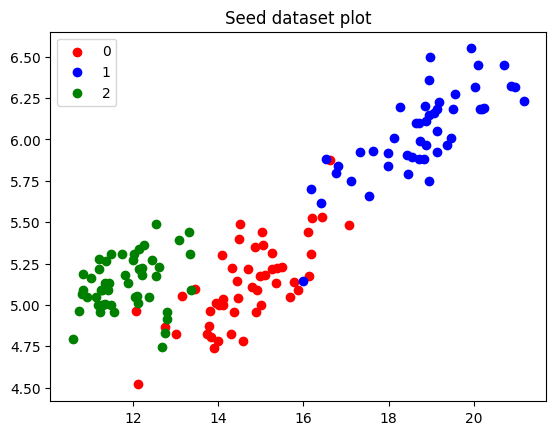

In [3]:
plt.scatter(X[y == '1', 0], X[y == '1', 6],  c = 'red', label = '0')
plt.scatter(X[y == '2', 0], X[y == '2', 6],  c = 'blue', label = '1')
plt.scatter(X[y == '3', 0], X[y == '3', 6],  c = 'green', label = '2')
plt.title('Seed dataset plot')
plt.legend()

Implementing Hierarchical Clustering:

In [4]:
# assigning the number to the linkage method:
# 0 --> Average 
# 1 --> Single
# 2 --> Complete
def distance_linkage(L):
    if L == 0:
        return average
    elif L == 1:
        return single
    elif L == 2:
        return complete

In [5]:
# calculating the distance between two points method using  distance formula
def distance_calculation(a, b):
  dist=[]
  for ai , bi in zip(a,b):
    dist.append((ai - bi)**2)
  return math.sqrt(sum(dist))

In [6]:
# implementation of the average linkage
# average similarity between any two items from the two clusters
def average(ai, aj):
  distances=[]
  for ci in ai:
    for cj in aj:
      distances.append(distance_calculation(ci, cj))
  return sum(distances) / len(distances)

In [7]:
# implemetation of the complete linkage
# similarity of the two most dissimilar items in the two clusters
def complete(ai, aj):
  distances=[]
  for ci in ai:
    for cj in aj:
      distances.append(distance_calculation(ci, cj))
  return max(distances)

In [8]:
# implementation of the single linkage
# similarity of the two most similar items in the two clusters 
def single(ai, aj):
  distances=[]
  for ci in ai:
    for cj in aj:
      distances.append(distance_calculation(ci, cj))
  return min(distances)

In [9]:
# each datapoint is a cluster when it is beginned
# clusters are stored in the form of dictionary
def initial_clusters(dataset):
    return {did: [dt] for did, dt in enumerate(dataset)}

In [10]:
# new clsuter are formed by using the appropriate linkage method
# which two clusters has to be mergred is returned from this function
def near_clusters(clusters,linkage):
        min_distance = math.inf
        near_clusters = None
        c_ids = list(clusters.keys())
        #print(c_ids)
        for i, cluster_i in enumerate(c_ids[:-1]):
            for j, cluster_j in enumerate(c_ids[i+1:]):
                dist = linkage(clusters[cluster_i], clusters[cluster_j])
                #print(dist)
                if dist < min_distance:
                    min_distance, near_clusters = dist, (cluster_i, cluster_j)
                    #print(near_clusters)
        return near_clusters

In [11]:
# merging of two cluster and forming single cluster is functionality of merge_clusters function
#the clusters which has to be merged is passed as a input to merge into single cluster 
def merge_clusters(clusters, ci_id, cj_id):
        new_clusters = {0: clusters[ci_id] + clusters[cj_id]}
        #print(new_clusters)
        for clust_id in clusters.keys():
            if (clust_id == ci_id) | (clust_id == cj_id):
                continue
            new_clusters[len(new_clusters.keys())] = clusters[clust_id]
            #print(new_clusters)
        return new_clusters

In [12]:
# the main function which calls other function in appropriate manner
# K - number of clusters
def  AgglomerativeHierarchicalClustering(clusters,K,linkage):
        while len(clusters.keys()) > K:
            near_clusters1 = near_clusters(clusters,linkage)
            clusters = merge_clusters(clusters,*near_clusters1)
        return clusters

In [13]:
# this function predict which datapoint belongs to which cluster
def prediction_function(clusters,X):
     y_pred=[0]*len(X)
     print(y_pred)
     for id, points in clusters.items():
            print("Cluster: {}".format(id))
            print(points)
            for point in points:
                print("    {}".format(point))
                for i in range(len(X)):
                  #print(i)
                  if((point == X[i]).all()):
                    #print(y_pred[i])
                    y_pred[i]= id+1
                    #print(y_pred)
     print(y_pred)
     return y_pred

Implemeting the KNearest Neighbor Algorithm:

In [14]:
# the cartesian distance is been calculated in this function
def cartesian_function(testdata, datas):
    test1=testdata.astype('float64')
    data1=datas.astype('float64')
    diff1 = np.power(test1 - data1, 2)
    difference = np.sum(diff1,axis=1)
    final_diff = np.power(difference, 0.5)
    return final_diff

In [15]:
# The classification of the correct labels are been done in this function
# for k=3 and 5 --> if the knn classifer doesnt come with the majority decision , i have classified as it based on k =1.
def classify(k, label):
    #print(k)
    output = label[:k]
    m = np.count_nonzero(output == 1)
    p = np.count_nonzero(output == 2)
    c = np.count_nonzero(output == 3)
    if m > p and m > c:
        return 1
    elif p > m and p> c:
        return 2
    elif c > m and c > p:
        return 3
    else:
      output = label[:1]
      return output

In [16]:
# this function defines the knn classification by finding the distance and sorting it. 
# this functions calls classify function to classify labels
def knn(testsample, k, data,y_train):
    labels = y_train
    distance = cartesian_function(testsample, data)
    #print(distance)
    final_distance = np.vstack((distance, labels))
    final = final_distance.T[:, 0].argsort()
    final_sorted_distance = final_distance.T[final]
    #print(final_sorted_distance)
    final_sorted_labels = final_sorted_distance.T[1]
    #print(final_sorted_labels)
    return classify(k,final_sorted_labels)

In [17]:
# calculating the centroids for the clusters
def new_centroids(n_c, X, clusters):
  cent = np.zeros((n_c, X.shape[1]))
  cent = cent.astype('float64')
  X = X.astype('float64')
  for i, points in clusters.items():
            print("Cluster: {}".format(id))
            cent[i, :] = np.mean(points, axis=0) 
  #for i in range(n_c):
    #print(np.mean(X[l == i, :], axis=0) )
    #cent[i, :] = np.mean(X[l == i, :], axis=0) 
  return cent

In [18]:
# euclidean_distance function
def euclidean_distance(n_c, X, c):
        distance = np.zeros((X.shape[0], n_c))
        X=X.astype('float64')
        c=c.astype('float64')
        #print(type(X))
        for i in range(n_c):
          a = X - c[i, :]
          #print(a)
          r_m = np.linalg.norm(a)
          distance[:, i] = np.square(r_m)
        return distance

In [19]:
# minimum distance function
def minimum_distance(distance):
        return np.argmin(distance)

Determining which linkage and cluster number is best using dendogram graph

Dendogram graph for Average linkage

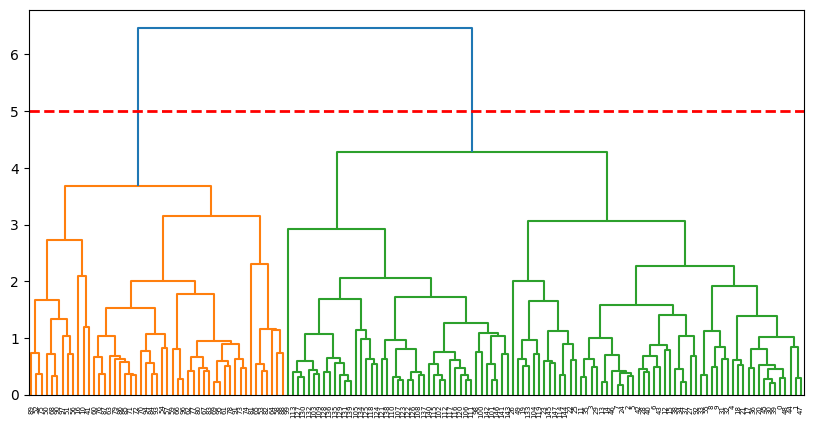

In [20]:
# the denodogram graph for average linkage and the horizontal line which has maximum longest vertical stretch
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(X, method='average')
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.hlines(y=5,xmin=0,xmax=3000,lw=2,color='red',linestyles='--')
plt.show()

Dendogram graph for Single linkage

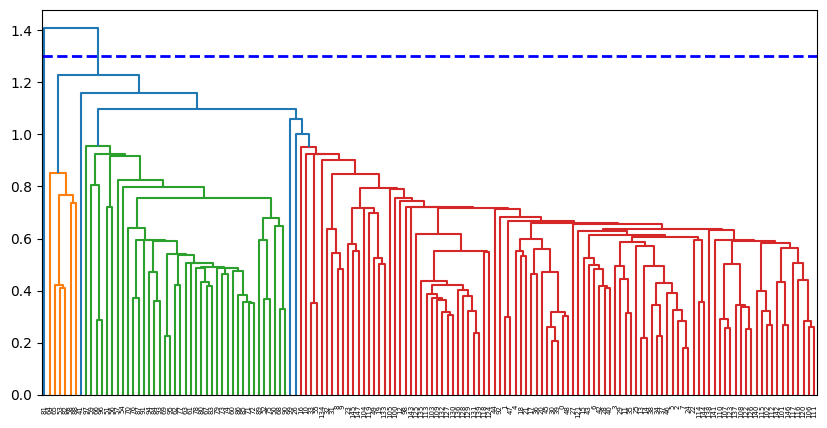

In [21]:
# the denodogram graph for single linkage and the horizontal line which has maximum longest vertical stretch
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(X, method='single')
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.hlines(y=1.3,xmin=0,xmax=3000,lw=2,color='blue',linestyles='--')
plt.show()

Dendogram graph for Complete linkage

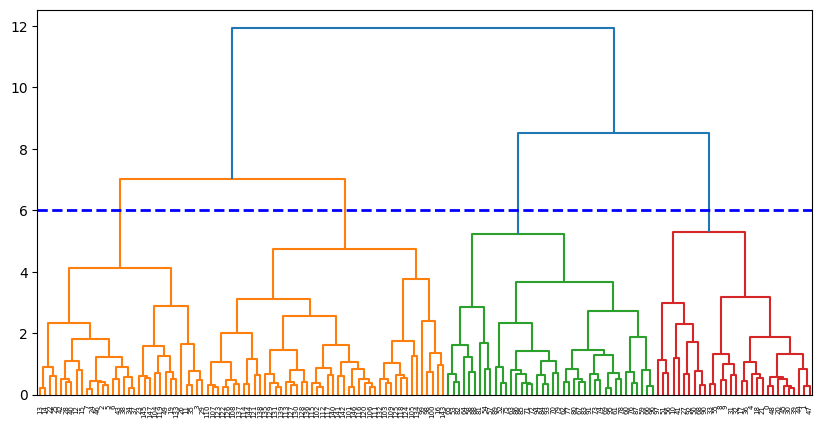

In [22]:
# the denodogram graph for complete linkage and the horizontal line which has maximum longest vertical stretch
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(X, method='complete')
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.hlines(y=6,xmin=0,xmax=3000,lw=2,color='blue',linestyles='--')
plt.show()

Running Hierarchical Clustering

For the number of cluster: 2 and Linkage method : Average

In [23]:
# k gives the value of number of clusters
# L is the linkage method value
# 0 --> average
# 1 --> single
# 2 --> complete
# final_clusters gives the cluster and the points in each of the clusters
# y_pred gives the label for the datapoint
K = 2
L = 0
clusters = initial_clusters(X)
linkage1 = distance_linkage(L)
final_clusters= AgglomerativeHierarchicalClustering(clusters,K,linkage1)
print(" the labels for the datapoints: ")
y_pred =prediction_function(final_clusters,X)
#print(len(y_pred))
y_pred=np.array(y_pred)
y = (np.array(y)).astype(int)

 the labels for the datapoints: 
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Cluster: 0
[array([14.88  , 14.57  ,  0.8811,  5.554 ,  3.333 ,  1.018 ,  4.956 ]), array([14.92  , 14.43  ,  0.9006,  5.384 ,  3.412 ,  1.142 ,  5.088 ]), array([14.52  , 14.6   ,  0.8557,  5.741 ,  3.113 ,  1.481 ,  5.487 ]), array([15.26 , 14.84 ,  0.871,  5.763,  3.312,  2.221,  5.22 ]), array([15.38  , 14.77  ,  0.8857,  5.662 ,  3.419 ,  1.999 ,  5.222 ]), array([15.05  , 14.68  ,  0.8779,  5.712 ,  3.328 ,  2.129 ,  5.36  ]), array([14.86  , 14.67  ,  0.8676,  5.678 ,  3.258 ,  2.129 ,  5.351 ]), array([15.03 

In [24]:
centroids= new_centroids(K,X,final_clusters)
print(centroids)

Cluster: <built-in function id>
Cluster: <built-in function id>
[[13.26414141 13.85686869  0.86372222  5.39762626  3.06669697  3.5888
   5.13316162]
 [18.61530612 16.23857143  0.88575102  6.16559184  3.71246939  3.73306122
   6.00618367]]


In [25]:
y_test = (np.array(y_test)).astype(int)
k=[1,3,5]
for v in k:
  predictions=0
  for i in range(len(X_test)):
    #print(X[i])
    distance = euclidean_distance(K,X_test[i], centroids)
    l = minimum_distance(distance)
    #print(l)
    #print(K)
    yp=[]
    for id, p in final_clusters.items():
      if(id == l):
        for ps in p:
          for j in range(len(X)):
            if((ps == X[j]).all()):
              yp.append(y[j])
  #print(yp)
  #print(len(yp))

    for id, p in final_clusters.items():
      #print((p))
      p=np.array(p)
      #print(X[i])
      if(id == l):
        predictvalue = knn(X_test[i], v, p, yp)
        #print(predictvalue)
        #print(y_test[i])
        if predictvalue == y_test[i]:
                #print(predictvalue)
                predictions += 1
  #print(predictions)
  print(f"KNN for k value:{v}")
  print(f"{predictions}/{X_test.shape[0]} correct predictions using all features")
  print(f'performance is : ', (predictions/X_test.shape[0]) * 100)
  print()

KNN for k value:1
49/62 correct predictions using all features
performance is :  79.03225806451613

KNN for k value:3
48/62 correct predictions using all features
performance is :  77.41935483870968

KNN for k value:5
50/62 correct predictions using all features
performance is :  80.64516129032258



For Linkage method: Single and Number of cluster :2

In [26]:
# k gives the value of number of clusters
# L is the linkage method value
# 0 - average
# 1 --> single
# 2--> complete
# final_clusters gives the cluster and the points in each of the clusters
# y_pred gives the label for the datapoint
K = 2
L = 1
clusters = initial_clusters(X)
linkage1 = distance_linkage(L)
final_clusters= AgglomerativeHierarchicalClustering(clusters,K,linkage1)
print(" the labels for the datapoints: ")
y_pred =prediction_function(final_clusters,X)
#print(len(y_pred))
y_pred=np.array(y_pred)
y = (np.array(y)).astype(int)

 the labels for the datapoints: 
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Cluster: 0
[array([12.26  , 13.6   ,  0.8333,  5.408 ,  2.833 ,  4.756 ,  5.36  ]), array([12.13  , 13.73  ,  0.8081,  5.394 ,  2.745 ,  4.825 ,  5.22  ]), array([12.44  , 13.59  ,  0.8462,  5.319 ,  2.897 ,  4.924 ,  5.27  ]), array([12.05  , 13.41  ,  0.8416,  5.267 ,  2.847 ,  4.988 ,  5.046 ]), array([12.55  , 13.57  ,  0.8558,  5.333 ,  2.968 ,  4.419 ,  5.176 ]), array([12.22  , 13.32  ,  0.8652,  5.224 ,  2.967 ,  5.469 ,  5.221 ]), array([12.38  , 13.44  ,  0.8609,  5.219 ,  2.989 ,  5.472 ,  5.045 ]), array(

In [27]:
centroids= new_centroids(K,X,final_clusters)
print(centroids)

Cluster: 1
Cluster: 1
[[15.00789116 14.63204082  0.87100748  5.6477551   3.27739456  3.6158449
   5.41791156]
 [19.14       16.61        0.8722      6.259       3.737       6.682
   6.053     ]]


In [28]:
k=[1,3,5]
y_test = (np.array(y_test)).astype(int)
for v in k:
  predictions=0
  for i in range(len(X_test)):
    #print(X[i])
    distance = euclidean_distance(K,X_test[i], centroids)
    l = minimum_distance(distance)
    #print(l)
    #print(K)
    yp=[]
    for id, p in final_clusters.items():
      if(id == l):
        for ps in p:
          for j in range(len(X)):
            if((ps == X[j]).all()):
              yp.append(y[j])
  #print(yp)
  #print(len(yp))

    for id, p in final_clusters.items():
      #print((p))
      p=np.array(p)
      #print(X[i])
      if( id == l):
        predictvalue = knn(X_test[i], v, p, yp)
        #print(predictvalue)
        #print(y_test[i])
        if predictvalue == y_test[i]:
                #print(predictvalue)
                predictions += 1
  #print(predictions)
  print(f"KNN for k value:{v}")
  print(f"{predictions}/{X_test.shape[0]} correct predictions using all features")
  print(f'performance is : ', (predictions/X_test.shape[0]) * 100)
  print()

KNN for k value:1
49/62 correct predictions using all features
performance is :  79.03225806451613

KNN for k value:3
48/62 correct predictions using all features
performance is :  77.41935483870968

KNN for k value:5
51/62 correct predictions using all features
performance is :  82.25806451612904



for linkage method: Complete and number of cluster:4

In [29]:
# k gives the value of number of clusters
# L is the linkage method value
# 0- average
# 1 --> single
# 2 --> complete
# final_clusters gives the cluster and the points in each of the clusters
# y_pred gives the label for the datapoint
K = 4
L = 2
clusters = initial_clusters(X)
linkage1 = distance_linkage(L)
final_clusters= AgglomerativeHierarchicalClustering(clusters,K,linkage1)
print(" the labels for the datapoints: ")
y_pred =prediction_function(final_clusters,X)
#print(len(y_pred))
y_pred=np.array(y_pred)
y = (np.array(y)).astype(int)

 the labels for the datapoints: 
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Cluster: 0
[array([14.88  , 14.57  ,  0.8811,  5.554 ,  3.333 ,  1.018 ,  4.956 ]), array([14.92  , 14.43  ,  0.9006,  5.384 ,  3.412 ,  1.142 ,  5.088 ]), array([14.52  , 14.6   ,  0.8557,  5.741 ,  3.113 ,  1.481 ,  5.487 ]), array([15.05  , 14.68  ,  0.8779,  5.712 ,  3.328 ,  2.129 ,  5.36  ]), array([14.86  , 14.67  ,  0.8676,  5.678 ,  3.258 ,  2.129 ,  5.351 ]), array([15.03  , 14.77  ,  0.8658,  5.702 ,  3.212 ,  1.933 ,  5.439 ]), array([15.01  , 14.76  ,  0.8657,  5.789 ,  3.245 ,  1.791 ,  5.001 ]), array(

In [30]:
centroids= new_centroids(K,X,final_clusters)
print(centroids)

Cluster: 1
Cluster: 1
Cluster: 1
Cluster: 1
[[15.88433333 15.03033333  0.88310667  5.7358      3.4273      2.73190333
   5.3935    ]
 [19.17175    16.4835      0.88631     6.262925    3.771475    3.480625
   6.11435   ]
 [11.8323913  13.2476087   0.84622391  5.2368913   2.83930435  4.99145652
   5.1355    ]
 [13.6753125  13.99625     0.8762      5.40596875  3.163375    2.73194063
   4.9960625 ]]


In [31]:
k=[1,3,5]
y_test = (np.array(y_test)).astype(int)
for v in k:
  predictions=0
  for i in range(len(X_test)):
    #print(X[i])
    distance = euclidean_distance(K,X_test[i], centroids)
    l = minimum_distance(distance)
    #print(l)
    #print(K)
    yp=[]
    for id, p in final_clusters.items():
      if(id == l):
        for ps in p:
          for j in range(len(X)):
            if((ps == X[j]).all()):
              yp.append(y[j])
  #print(yp)
  #print(len(yp))

    for id, p in final_clusters.items():
      #print((p))
      p=np.array(p)
      #print(X[i])
      if( id == l):
        predictvalue = knn(X_test[i], v, p, yp)
        #print(predictvalue)
        #print(y_test[i])
        if predictvalue == y_test[i]:
                #print(predictvalue)
                predictions += 1
  #print(predictions)
  print(f"KNN for k value:{v}")
  print(f"{predictions}/{X_test.shape[0]} correct predictions using all features")
  print(f'performance is : ', (predictions/X_test.shape[0]) * 100)
  print()

KNN for k value:1
50/62 correct predictions using all features
performance is :  80.64516129032258

KNN for k value:3
50/62 correct predictions using all features
performance is :  80.64516129032258

KNN for k value:5
51/62 correct predictions using all features
performance is :  82.25806451612904



After checking the optimal number of clusters for each linkage method:
 Number of clusters = 4 for the complete linkage performs better than the other linkage method as shown in the above results